Topics covered in this chapter:
- 10.2 Two Sample Test for Binomial Proportions
- 10.3 Fisher's Exact Test
- 10.4 Two Sample Test for Binomial Proportions for Matched Data (McNemar's Test)
- 10.5 Estimation of Sample Size and Power for Comparing Two Binomial Proportions
- 10.6 RxC Contingency Tables
- 10.7 Chi-Square Goodness of Fit Test
- 10.8 The Kappa Statistic



Useful Links:
1. https://www.statsmodels.org/stable/stats.html
2. https://influentialpoints.com/Sitemap.htm

In [3]:
from IPython.display import Image

# 10.2 - Two Sample Test for Binomial Proportions

Testing for equivalency of proportions/rates (p<sub>1</sub> == p<sub>2</sub>).

## Normal-Theory method

**Assumptions**:
1. Normal approximation of the binomial distribution is valid (n<sub>1</sub>pq >= 5 && n<sub>2</sub>pq >= 5)

**Hypotheses:**
1. H<sub>0</sub>: p<sub>1</sub> == p<sub>2</sub>
2. H<sub>a</sub>: p<sub>1</sub> != p<sub>2</sub>

**Mechanics**:
1. Python:<br>
    `statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)`
    Note that this does not include a continuity correction factor.
2. R<br>
    

### Example 10.4 on page 373
The set of women with at least one birth was arbitrarily divided into two catego- ries: (1) women whose age at first birth was ≤29 years and (2) women whose age at first birth was ≥30 years. The following results were found among women with at least one birth: 683 of 3220 (21.2%) women with breast cancer (case women) and 1498 of 10,245 (14.6%) women without breast cancer (control women) had an age at first birth ≥30. How can we assess whether this difference is significant or simply due to chance?

In [18]:
from statsmodels.stats.proportion import proportions_ztest
# proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

# we want to see whether women whose age is >= 30 have a different rate of breast cancer
# compared with women whose age is <= 29

# so we have two samples: age <= 29, and age >= 30
# with two events each: breast cancer (case), and no breast cancer (control) 

n_total = 3220 + 10245 # total women participants in study
x_total = 3220
n_30 = 683 + 1498
n_29 = n_total - n_30

x_30 = 683
x_29 = x_total - x_30

# compute proportions
p_29 = x_29 / n_29
p_30 = x_30 / n_30

print(x_29, n_29)
print(x_30, n_30)
print(p_29, p_30)

count = [x_29, x_30]
nobs = [n_29, n_30]
proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

2537 11284
683 2181
0.22483161999291032 0.3131591013296653


(-8.852674168440814, 8.544684355750345e-19)

The rate of beast cancer among women who are >=30 is significantly different from the rate of breast cancer among women age <= 29.

## Chi-Squared Test for Homogeneity of Binomial Proportions (Contingency Table Method)

**Test for Homogeneity of Binomial Proportions**: Test whether proportions are the same in two independent samples.

**Test of Independence / Test of Association**: Test whether there is some association between two measures.

Both tests use the same procedure. 

|                        |Dies (event == 1)|Survives (event == 0)| 
|---                     |---              |---                  | 
|Case (treatment == 1)   |                 |                     |
|Control (treatment == 0)|                 |                     |

variables:
- treatment (or condition)
- event (or outcome)

unit of analysis/measurement:
- number of individuals with treatment & event

**Assumptions**:
1. No cell in the observed AND expected value table is < 5
2. Samples are independent (unpaired)

**Hypotheses:**<br>
Stated in terms of homogeneity of binomial proportions...
1. H0: p1 = p2 
2. Ha: p1 ≠ p2

Stated in terms of association / independence...
1. H0: there is no association between the two variables (treatment & outcome), i.e. treatment has no effect on outcome, i.e. rates of the outcome are the same for each treatment group, i.e. p1 = p2
2. Ha: there is an association between the two variables (treatment & outcome).

**Test Statistic:** <br>
Pearson chi-square statistic or Yates-corrected chi-square statistic

**Yate's Continuity Correction:**<br>
*Applying Yate's Continuity Correction increase the p-value, causing results to become less significant... So it is suggested that Yates's correction is unnecessary even with quite low sample sizes... (from https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity)*

*Other sources recommend using Yate's Continuity Correction when the total observations < 40, and others put that number at 20...*
https://www.sciencedirect.com/topics/medicine-and-dentistry/yates-continuity-correction#:~:text=Chi%2Dsquare%20analysis%20with%20greater,tables%20is%20less%20than%2040.

**Mechanics**:

Form a 2 × 2 table of matched pairs, where the outcomes for the treatment A members of the matched pairs are listed along the rows and the outcomes for the treatment B members are listed along the columns.

1. Python:<br>
    `scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)`
2. R<br>
    `chisq.test(x, y)`
    x and y are two vectors corresponding to two variables. 

### Example 10.13

Assess the breast-cancer data in Example 10.4 (p. 373) for statistical signifi- cance, using a contingency-table approach.

In [43]:
# if columns are age >=30, age <= 29
# and rows are case, control
obs = np.array([[x_30,x_29],[n_30-x_30, n_29-x_29]])
print(obs)

from scipy.stats import chi2_contingency
chi2, p, dof, exp = chi2_contingency(obs, correction=True)
print(chi2, p)
print(dof)
print(exp)

[[ 683 2537]
 [1498 8747]]
77.88514590360013 1.092095682798281e-18
1
[[ 521.56108429 2698.43891571]
 [1659.43891571 8585.56108429]]


In [39]:
chi2, p, dof, exp = chi2_contingency(obs, correction=False)
print(p)

8.544684355750283e-19


Note that with `correction=False` we achieve the same p-value as using `statsmodels` z-test for proportions. 

# 10.3 - Fisher's Exact Test

Used when the Normal Approximation to the binomial distribution is not valid (for instance, because of small sample size).

**Hypotheses**

H0:p1 = p2<br>
H1:p1 ≠ p2<br>
    
**Mechanics**:
1. Python<br>
    `scipy.stats.fisher_exact(table, alternative='two-sided')`
2. R

In [42]:
from scipy.stats import fisher_exact
fisher_exact(obs, alternative='two-sided')

(1.5719819304467446, 5.8734739293297086e-18)

# 10.4 - McNemar's Test 
Otherwise known as a <br>
**Two Sample Test for Binomial Proportions for Matched Data** or <br>
**McNemar's Test for Correlated Proportions**

Data is recast into a count of **discordant type A pairs** and **discordant type B pairs**, where 

|                    |Person B Survives|Person B Dies   | 
|---                 |---              |---             | 
|person A Survives   |                 |n<sub>B</sub>   |
|person A Dies       |n<sub>A</sub>    |                |

variables:
- outcome of person A in pair
- outcome of person B in pair

unit of analysis/measurement:
- number of pairs
    
**Hypotheses:**<br>
1. H0: p = 0.5, p = Pr(discordant pair is of type A)
2. Ha: p != 0.5

**Assumptions**:
1. Normal approximation to binomial distribution holds (n<sub>D</sub> >= 20, where n<sub>D</sub> = total # of discordant pairs)<br>
    a. If this assumption can not be held, then an exact test based on exact binomial probabilities must be used. 
    
**Test Statistic**:<br>
Count the total number of discordant pairs $\left(n_{D}\right)$ and the number of type $A$ discordant pairs $\left(n_{A}\right)$.<br>
Compute the test statistic
$$
X^{2}=\left(\left|n_{A}-\frac{n_{D}}{2}\right|-\frac{1}{2}\right)^{2} /\left(\frac{n_{D}}{4}\right)
$$
An equivalent version of the test statistic is also given by
$$X^{2}=\left(\left|n_{A}-n_{B}\right|-1\right)^{2} /\left(n_{A}+n_{B}\right)$$
where $n_{p}=$ number of type $\mathrm{B}$ discordant pairs.

**Mechanics**:
1. Python<br>
    `statsmodels.stats.contingency_tables.mcnemar(table, exact=True, correction=True)`<br>
    `exact=True` must be set to True if small sample size (n<sub>D</sub> < 20), but equally valid for large samples.
2. R<br>
    if x and y are vectors of the raw data:<br>
    `mcnemar.test(x, y)` <br>
    if starting with summary data:<br>
    `table<- matrix(c(a,c,b,d), nrow = 2)`<br>
    `mcnemar.test(table)`

### Example 10.23

Compare the effect of treatment A vs treatment B in terms of survival rates for the *paired* cancer patients.

In [55]:
from statsmodels.stats.contingency_tables import mcnemar

In [58]:
# columns are Event: survive w/ in 5 years (event == 0), death w/ in 5 years (event == 1)
# rows are Case/Control: treatment A (case), treatment B (control)
raw_data = [[526, 95],[515, 106]]

In [59]:
# if we assume independence of data...
chi2_contingency(raw_data)

(0.5935739171577272,
 0.4410404253228085,
 1,
 array([[520.5, 100.5],
        [520.5, 100.5]]))

Result is not significant at 5% level.

However the data is not independent, so we re-cast it in terms of **discordant** and **concordant** events, and test the Null hypothesis of p == 0.5, where p = the probability that a discordant event is of type A (patient A has the event, and patient B does not).

Thus we test whether there is a difference in survival rates between treatment A and treatment B.

In [73]:
## using the pair as the unit of observation, instead of the individual
obs = [[510, 16],[5, 90]]

bunch = mcnemar(obs, exact=False, correction=True)
bunch.statistic, bunch.pvalue

(4.761904761904762, 0.029096331741252267)

The p-value is significant at the 5% level, meaning that the effects of treatment A and treatment B are not the same. 

The text says "We conclude that if the treatments give different results from each other for the members of a matched pair, then the treatment A member of the pair is significantly more likely to survive for 5 years than the treatment B member" but H0 is just testing if there is a difference in proportions, not whether one proportion is bigger or smaller than the other - ***so did the author make a mistake?***

### Review Questions 10C

In [74]:
obs = [[45, 8],[10, 3]]

bunch = mcnemar(obs, exact=False, correction=True)
bunch.statistic, bunch.pvalue

(0.05555555555555555, 0.8136637157667919)

# 10.5 - Estimation of Sample Size and Power for Comparing Two Binomial Proportions

## Independent Samples

**Sample Size Needed to Compare Two Binomial Proportions Using a Two-Sided Test with Significance Level $\alpha$ and Power $1-\beta,$ Where One Sample $\left(n_{2}\right)$ Is $k$ Times as Large as the Other Sample $\left(n_{1}\right)$ (Independent-Sample Case)**

To test the hypothesis $H_{0}: p_{1}=p_{2}$ vs. $H_{1}: p_{1} \neq p_{2}$ for the specific alternative $\left|p_{1}-p_{2}\right|=\Delta,$ with a significance level $\alpha$ and power $1-\beta,$ the following sample size is required
$$
n_{1}=\left[\sqrt{\bar{p} \bar{q}\left(1+\frac{1}{k}\right)} z_{1-\alpha / 2}+\sqrt{p_{1} q_{1}+\frac{p_{2} q_{2}}{k}} z_{1-\beta}\right]^{2} / \Delta^{2}
$$
where $p_{1}, p_{2}=$ projected true probabilities of success in the two groups
$$n_{2}=k n_{1}$$
$$q_{1}, q_{2}=1-p_{1}, 1-p_{2}$$
$$\Delta=\left|p_{2}-p_{1}\right|$$
$$
\begin{array}{l}
\bar{p}=\frac{p_{1}+k p_{2}}{1+k} \\
\bar{q}=1-\bar{p}
\end{array}
$$


Note: To perform a one-tailed rather than a two-tailed test, simply substitute α for α/2 in the sample-size formula in Equation

*To adjust for non-compliance rates, the following formula can be used to calculate adjusted rates, which can then be used in the normal power and sample estimate calculations (I haven't verified this! just took it from the book):*
$$
\begin{aligned}
p_{1}^{*} &=\left(1-\lambda_{1}\right) p_{1}+\lambda_{1} p_{2} \\
p_{2}^{*} &=\left(1-\lambda_{2}\right) p_{2}+\lambda_{2} p_{1} \\
\end{aligned}
$$

**Mechanics**:
1. Python<br>
    `statsmodels.stats.power.zt_ind_solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided')`<br>
    `alternative`: one of `['two-sided','larger','smaller']`<br> 
    `effect_size`: standardized effect size, difference between the two means divided by the standard deviation. This can be derived using a convenience function within statsmodels:
    `statsmodels.stats.proportion.proportion_effectsize(prop1, prop2, method='normal')`
    
    exactly one needs to be None, all others need numeric values<br>

### Example 10.29 - sample size estimation for test of binomial proportions with perfect compliance, un-paired case

In [89]:
power = 0.8
alpha = 0.05
ratio = 1.0
nobs1 = None # variable in question

In [81]:
p1 = 150 / 100000
q1 = 1 - p1

In [100]:
p2 = p1 * 0.8
q2 = 1 - p2

$$
z=\left(\hat{p}_{1}-\hat{p}_{2}\right) / \sqrt{p q\left(1 / n_{1}+1 / n_{2}\right)} \sim N(0,1)
$$
The problem is that $p$ and $q$ are unknown, and thus the denominator of $z$ cannot be computed unless some estimate for $p$ is found. The best estimator for $p$ is based on a weighted average of the sample proportions $\hat{p}_{1}, \hat{p}_{2} .$ This weighted average, referred to as $\hat{p},$ is given by
$$
\hat{p}=\frac{n_{1} \hat{p}_{1}+n_{2} \hat{p}_{2}}{n_{1}+n_{2}}=\frac{x_{1}+x_{2}}{n_{1}+n_{2}}
$$

In [103]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(prop1=p1, prop2=p2, method='normal')
n = sms.NormalIndPower().solve_power(es, nobs1, alpha, power, ratio, alternative='two-sided')
n

234420.56999151243

In [106]:
effect_size = es

In [107]:
from statsmodels.stats.power import zt_ind_solve_power
n = zt_ind_solve_power(effect_size, nobs1, alpha, power, ratio, alternative='two-sided')
print(n)

234420.56999151243


Both functions give the same answer as the text.

### Example 10.37 - estimation of sample size needed for test of binomial proportions with non-compliance rates

Refer to Example 10.36. Suppose we assume that the incidence of MI is .005 per year among participants who actually take placebo and that aspirin prevents 20% of MIs (i.e., relative risk = p1/p2 = 0.8). We also assume that the duration of the study is 5 years and that the dropout rate in the aspirin group = 10% and the drop- in rate in the placebo group = 5%. How many participants need to be enrolled in each group to achieve 80% power using a two-sided test with significance level = .05?

*The incidence of MI is 0.005 **per year** for the placebo group, therefore the 5-year incidence rate of MI is 5 * 0.005 = 0.025*

In [7]:
p1 = 0.025
p2 = 0.02 # p1/p2 = 0.8
power = 0.8
alpha = 0.05
ratio = 1
nobs1 = None # variable in question

In [10]:
import statsmodels.stats.api as sms

In [28]:
# first calculate sample size needed assuming compliance is perfect
es = sms.proportion_effectsize(prop1=p1, prop2=p2, method='normal')
n_perfect_compliance = sms.NormalIndPower().solve_power(es, nobs1, alpha, power, ratio=1, alternative='two-sided')
n1 = round(n_perfect_compliance)
n2 = n1
print(n1, n2)
print('Total sample size needed = ', n1 + n2)

13768 13768
Total sample size needed =  27536


In [29]:
# calculate sample size needed factoring in dropout and dropin rates
gamma1 = 0.1
gamma2 = 0.05
# From equation 10.17 in the book, we can use the approximation since both gamma1 and gamma2 are <= 0.1
n1 = n_perfect_compliance / (1 - gamma1 - gamma2) ** 2 
n1 = round(n1)
n2 = n1
print(n1, n2)
print('Total sample size needed = ', n1 + n2)

19056 19056
Total sample size needed =  38112


## Paired Samples

Sample Size Needed to Compare Two Binomial Proportions Using a Two-Sided Test with Significance Level $\alpha$ and Power $1-\beta$ (Paired-Sample Case)

If McNemar's test for correlated proportions is used to test the hypothesis $H_{0}: p=\frac{1}{2}$ vs. $H_{1}: p \neq \frac{1}{2},$ for the specific alternative $p=p_{A^{\prime}}$, where $p=$ the probability that a discordant pair is of type $A$, with a significance level of $\alpha$ and power
$1-\beta,$ then use
$$
n=\frac{\left(z_{1-\alpha / 2}+2 z_{1-\beta} \sqrt{p_{A} q_{A}}\right)^{2}}{4\left(p_{A}-.5\right)^{2} p_{D}} \text { matched pairs }
$$
$$
\text { or } 2 n=\frac{\left(z_{1-\alpha / 2}+2 z_{1-\beta} \sqrt{p_{A} q_{A}}\right)^{2}}{2\left(p_{A}-.5\right)^{2} p_{D}} \text { individuals }
$$
$p_{D}=$ projected proportion of discordant pairs among all pairs<br>
$p_{A}=$ projected proportion of discordant pairs of type A among discordant pairs

**Power Achieved in Comparing Two Binomial Proportions Using a Two-Sided Test
with Significance Level α (Paired-Sample Case)**<br>
If McNemar's test for correlated proportions is used to test the hypothesis $H_{0}: p=1 / 2$ vs. $H_{1}: p \neq 1 / 2,$ for the specific alternative $p=p_{A^{\prime}}$, where $p=$ the probability that a discordant pair is of type A,
$$
=\Phi\left[\frac{1}{2 \sqrt{p_{A} q_{A}}}\left(z_{\alpha / 2}+2\left|p_{A}-.5\right| \sqrt{n p_{D}}\right)\right]
$$
where
$n=$ number of matched pairs
$p_{D}=$ projected proportion of discordant pairs among all pairs
$p_{A}=$ projected proportion of discordant pairs of type A among discordant pairs

**Mechanics**:
1. Python
    <br>I'm not sure this has been implemented in Python, although that's a bit hard for me to believe, but I can't find it. I would think it would be in this list, but it doesn't seem to be: https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations
2. R<br>
    `power.mcnemar.test(n = NULL, paid = NULL, psi = NULL, sig.level = 0.05, power = NULL, alternative = c("two.sided", "one.sided"), method = c("normal", "exact"))`

In [131]:
from scipy import stats
alpha = 0.05
power = 0.9
z1 = stats.norm.ppf(1-alpha/2)
z2 = stats.norm.ppf(power)
pa = 2/3
qa = 1-pa
pd = 0.15

n = (z1 + 2 * z2 * np.sqrt(pa*qa))**2 / (4 * (pa - 0.5)**2 * pd)
print(n, 'matched pairs')

602.2579859093038 matched pairs


# 10.6 RxC Contingency Tables

R rows and C columns.

**Assumptions**:
1. No more than 1/5 of the cells have expected values < 5. and
2. No cell has an expected value < 1.

**Hypotheses**:<br>
H0: All groups come from the same underlying population distribution<br>
Ha: There are at least 2 distinct underlying population distributions<br>

**For the special case of a 2 × k table**, this test procedure enables us to test the hypothesis:<br>
H0: p1=p2=...=pk<br>
Ha:at least two of the pi’s are unequal, where p = probability of success for the ith group = probability that an observation from the ith column falls in the first row. 

**Mechanics**:
1. Python<br>
    `scipy.stats.chi2_contingency(observed)`
    
**Continuity Correction**:
(From the Fundamentals of Biostatistics, 8th Edition, Rosner, B.): "Generally speaking, the continuity correction is not used for contingency tables larger than 2 × 2 because statisticians have found empirically that the correction does not help in the approximation of the test statistic by the chi-square distribu- tion."

## Chi-Square Test for Trend in Binomial Proportions


Suppose there are k groups and we want to test whether there is an increasing (or decreasing) trend in the proportion of “successes” p<sub>i</sub> (the proportion of units in the first row of the ith group) as i increases.

**Hypotheses**
- H0: There is no trend
- Ha: There is a trend

**Mechanics**:
1. Python<br>
    Couldn't find one.
2. R<br>
    `prop.trend.test(x, n, score)`

### Example 1

We want to relate the proportion of breast-cancer cases in a group to the score variable for that group. In other words, we wish to test whether the proportion of breast-cancer cases increases or decreases as age at first birth increases. For this pur- pose the following test procedure is introduced.

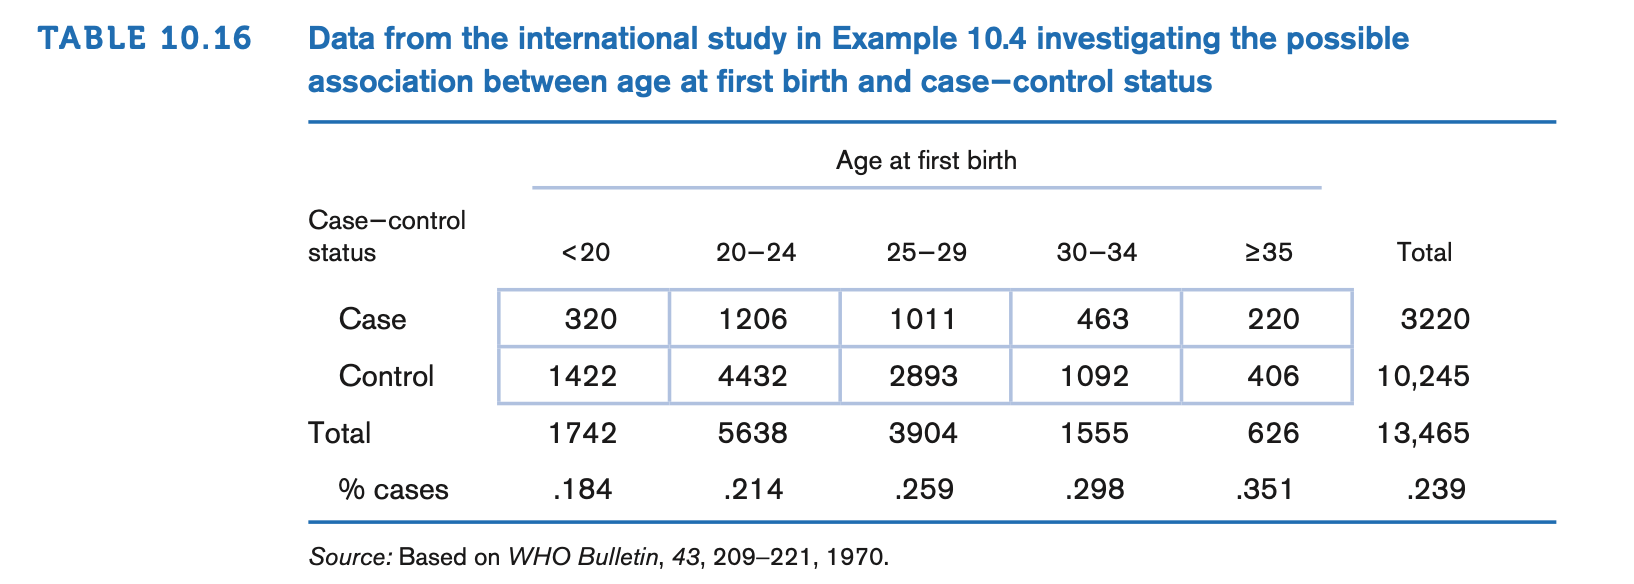

In [6]:
Image("../assets/images/fundamentals-of-biostatistics-bernard-rosner/chapter-10/chapter-10-test-for-trend-example.jpg")

```
> x<- c(320, 1206, 1011, 463, 220) 
> n<- c(1742, 5638, 3904, 1555, 626) 
> score<- c(1:5)
> prop.trend.test(x,n,score)
Chi-squared Test for Trend in Proportions
data: x out of n,
using scores: 1 2 3 4 5
X-squared = 129.012, df = 1, p-value < 2.2e-16
```

Result is highly significant so we can reject the null and accept the alternative that there is a trend. 

### Example 2

https://www.ajodo.org/article/S0889-5406(16)30655-2/fulltext
Interested in seeing, for example, if frequency of brushing teeth decreases occurrences of gingivitis.

### Relationship Between the Wilcoxon Rank-Sum Test and the Chi-Square Test for Trend

# 10.7 Chi-Square Goodness of Fit Test

This section presents a general method of testing for the goodness-of-fit of a probability model.

This assumption can be tested by first computing what the expected frequencies would be in each group if the data did come from an underlying normal distribution and by then comparing these expected frequencies with the corresponding observed frequencies.

**Usefulness**:
<br>*Useful for checking whether underlying assumption that data come from an x distribution is accurate or not, so that other methods of statistical inference can be used with confidence.*

**Hypotheses**:
<br>H0: Data come from a x distribution (usually normal, but the goodness of fit test can be used to check the goodness of fit for any probability model)
<br>Ha: Data do not come from a x distribution

**Mechanics**:
1. Python<br>
    https://www.statsmodels.org/stable/stats.html#goodness-of-fit-tests-and-measures<br>
    `scipy.stats.chisquare(f_obs, f_exp, dof)`
2. R<br>
    `chisq.test(x = observed, p = expected)`

# 10.8 Kappa Statistic

In some instances, some association is expected between the variables and the issue is quantifying the degree of association. 

Kappa is usually used as a **measure of reproducibility between repeated assessments of the same variable.**

**Usefulness**:
1. **reliability studies**, where the researcher wants to quantify the reproducibility of the same variable (e.g., dietary intake of a particular food) measured more than once.

**Hypotheses**:
<br>H0: p<sub>o</sub> = p<sub>e</sub>
<br>Ha: p<sub>o</sub> != p<sub>e</sub>
<br>p<sub>o</sub> = observed percentage of concordant responses
<br>p<sub>e</sub> = expected percentage of concordant responses, assuming outcomes are statistically independent

The Kappa Statistic
(1) If a categorical variable is reported at two surveys by each of $n$ subjects, then the Kappa statistic (\kappa) is used to measure reproducibility between surveys, where
$$
\kappa=\frac{p_{o}-p_{e}}{1-p_{e}}
$$
$p_{o}=$ observed probability of concordance between the two surveys<br>
$p_{e}=$ expected probability of concordance between the two surveys $ =\Sigma a_{i} b_{i} $<Br>
where $a_{i}, b_{i}$ are the marginal probabilities for the $i$ th category in the $c \times c$ contingency table relating response at the two surveys.
    
<br>H0: κ = 0
<br>H1: κ > 0
    
**Guidelines for Evaluating Kappa**:
<br>κ > 75 denotes excellent reproducibility.
<br>.4 ≤ κ ≤ .75 denotes good reproducibility.
<br>0 ≤ κ < .4 denotes marginal reproducibility.
